## Scikit Learn
Scikit Learn is a free python machine learning library which features various algorithms like support vector machine (SVM), random forests, k-neighbours. It supports Python numerical libraries like NumPy and SciPy. 

In [3]:
import sklearn

print(sklearn.__version__)

0.23.2


## Loading an example dataset

In [4]:
from sklearn import datasets

# Data to quantify the morphologic variation of Iris flowers
# of three related species
iris = datasets.load_iris()
digits = datasets.load_digits()

In [7]:
print(f"Access to the features that can be used to classify the digits samples:\n{digits.data}")

Access to the features that can be used to classify the digits samples:
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [8]:
print(f"Ground truth for the digits dataset:\n{digits.target}")

Ground truth for the digits dataset:
[0 1 2 ... 8 9 8]


In [11]:
print(f"Shape of the data arrays:\n{digits.images[0]}")

Shape of the data arrays:
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


## Learning and Predicting
In Scikit Learn, an estimator for classification is a Python object that implements the methods ```fit(X, y)``` and ```predict(T)```.

Classification report for classifier SVC(C=100, gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        60
           1       1.00      1.00      1.00        71
           2       1.00      1.00      1.00        69
           3       0.99      0.97      0.98        71
           4       1.00      1.00      1.00        72
           5       0.97      0.99      0.98        69
           6       0.99      1.00      0.99        85
           7       1.00      0.99      0.99        74
           8       0.99      1.00      0.99        74
           9       0.99      0.97      0.98        74

    accuracy                           0.99       719
   macro avg       0.99      0.99      0.99       719
weighted avg       0.99      0.99      0.99       719


Confusion matrix:
[[60  0  0  0  0  0  0  0  0  0]
 [ 0 71  0  0  0  0  0  0  0  0]
 [ 0  0 69  0  0  0  0  0  0  0]
 [ 0  0  0 69  0  1  0  0  1  0]
 [ 0  0  0  0 72  0  0  0  0

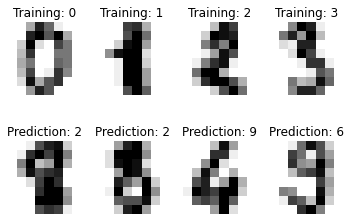

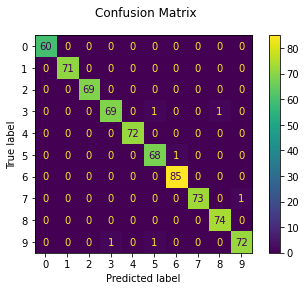

In [29]:
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

clf = svm.SVC(gamma=0.001, C=100) # classifier

_, axes = plt.subplots(2, 4)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" %label)
    
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into train and test subsets
X_train, X_test, Y_train, Y_test = train_test_split(data, digits.target, test_size=0.4, shuffle=True)

# Training
clf.fit(X_train, Y_train)

# Prediction
predicted = clf.predict(X_test)

images_and_predictions = list(zip(digits.images[n_samples // 2:], predicted))
for ax, (image, prediction) in zip(axes[1, :], images_and_predictions[:4]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Prediction: %i' % prediction)
    
print("Classification report for classifier %s:\n%s\n"
      % (clf, metrics.classification_report(Y_test, predicted)))
disp = metrics.plot_confusion_matrix(clf, X_test, Y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()

## Model Persistence
Save a model in sklearn by using pickle

In [1]:
from sklearn import svm
from sklearn import datasets

clf = svm.SVC()
X, Y = datasets.load_iris(return_X_y=True)
clf.fit(X,Y)

SVC()

In [3]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])

array([0])

In [33]:
Y[0]

0

## Statistical-learning for Scientific Data Processing

In [55]:
from sklearn import datasets

iris = datasets.load_iris()
data = iris.data
data.shape 
# 150 observations of irises, each described by 4 feautures
# m = 150, n = 4

(150, 4)

## Supervised Learning
* classification 
* regression

In [58]:
import numpy as np
from sklearn import datasets
iris_X, iris_Y = datasets.load_iris(return_X_y=True)
np.unique(iris_Y)

array([0, 1, 2])

In [59]:
from sklearn.neighbors import KNeighborsClassifier

np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_Y_train = iris_Y[indices[:-10]]
iris_Y_test = iris_Y[indices[-10:]]
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_Y_train)

KNeighborsClassifier()

In [60]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [61]:
iris_Y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

### Linear Regression

In [63]:
from sklearn import linear_model

diabetes_X, diabetes_Y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_Y_train = diabetes_Y[:-20]
diabetes_X_test = diabetes_X[-20:]
diabetes_Y_test = diabetes_Y[-20:]
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_Y_train)

LinearRegression()

In [64]:
print(regr.coef_)

[ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


In [65]:
# mean square error
np.mean((regr.predict(diabetes_X_test) - diabetes_Y_test)**2)

2004.5676026898207

In [67]:
# Explained variance score: 1 is prefect pred.
# 0 means that there is no linear relation between X and Y
regr.score(diabetes_X_test, diabetes_Y_test)

0.5850753022690575

## Support Vector Machines (SVMs)

**Warning: Normalizing data**<br>
For many estimators, including the SVMs, having datasets with unit standard deviation for each feature is important to get good prediction.

In [70]:
from sklearn import svm

svc = svm.SVC(kernel="linear") # linear, poly, rbf
svc.fit(iris_X_train, iris_Y_train)

SVC(kernel='linear')

## Cross Validation error, Test error
Using cv or test to find out **overfitting (high variance)** vs **underfitting (high bias)**.

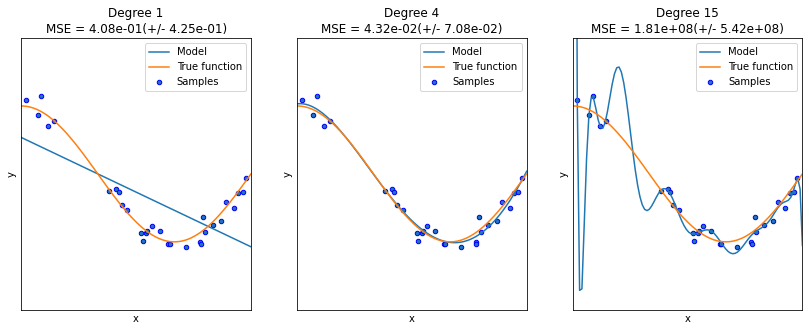

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

# Unsupervised Learning Algorithm

## Mean-shift Clustering Algorithm

Number of estimated clusters: 3



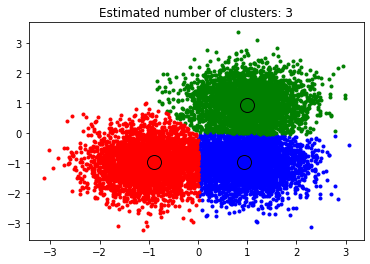

In [12]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets import make_blobs

# Generate smaple data
centers = [[1,1], [-1,-1], [1,-1]]
X, _ = make_blobs(n_samples=10000, centers=centers, cluster_std=0.6)

# Compute the clustering with Meanshift
# detect the following bandwidth using built-in func
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=800)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print(f"Number of estimated clusters: {n_clusters_}\n")

## PLOT RESULT ##
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + ".")
    plt.plot(cluster_center[0], cluster_center[1], "o", markerfacecolor=col,
             markeredgecolor="k", markersize=14)
    
plt.title(f"Estimated number of clusters: {n_clusters_}")
plt.show()

## Preprocessing
Feature Scaling or map data to a normal distribution

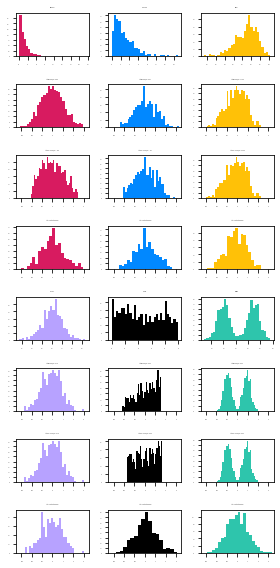

In [22]:
# Using powertransformer
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.model_selection import train_test_split

N_SAMPLES = 1000
FONT_SIZE = 0
BINS = 30

rng = np.random.RandomState(304)
bc = PowerTransformer(method='box-cox')
yj = PowerTransformer(method='yeo-johnson')
# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt = QuantileTransformer(n_quantiles=500, output_distribution='normal',
                         random_state=rng)
size = (N_SAMPLES, 1)


# lognormal distribution
X_lognormal = rng.lognormal(size=size)

# chi-squared distribution
df = 3
X_chisq = rng.chisquare(df=df, size=size)

# weibull distribution
a = 50
X_weibull = rng.weibull(a=a, size=size)

# gaussian distribution
loc = 100
X_gaussian = rng.normal(loc=loc, size=size)

# uniform distribution
X_uniform = rng.uniform(low=0, high=1, size=size)

# bimodal distribution
loc_a, loc_b = 100, 105
X_a, X_b = rng.normal(loc=loc_a, size=size), rng.normal(loc=loc_b, size=size)
X_bimodal = np.concatenate([X_a, X_b], axis=0)


# create plots
distributions = [
    ('Lognormal', X_lognormal),
    ('Chi-squared', X_chisq),
    ('Weibull', X_weibull),
    ('Gaussian', X_gaussian),
    ('Uniform', X_uniform),
    ('Bimodal', X_bimodal)
]

colors = ['#D81B60', '#0188FF', '#FFC107',
          '#B7A2FF', '#000000', '#2EC5AC']

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=plt.figaspect(2))
axes = axes.flatten()
axes_idxs = [(0, 3, 6, 9), (1, 4, 7, 10), (2, 5, 8, 11), (12, 15, 18, 21),
             (13, 16, 19, 22), (14, 17, 20, 23)]
axes_list = [(axes[i], axes[j], axes[k], axes[l])
             for (i, j, k, l) in axes_idxs]


for distribution, color, axes in zip(distributions, colors, axes_list):
    name, X = distribution
    X_train, X_test = train_test_split(X, test_size=.5)

    # perform power transforms and quantile transform
    X_trans_bc = bc.fit(X_train).transform(X_test)
    lmbda_bc = round(bc.lambdas_[0], 2)
    X_trans_yj = yj.fit(X_train).transform(X_test)
    lmbda_yj = round(yj.lambdas_[0], 2)
    X_trans_qt = qt.fit(X_train).transform(X_test)

    ax_original, ax_bc, ax_yj, ax_qt = axes

    ax_original.hist(X_train, color=color, bins=BINS)
    ax_original.set_title(name, fontsize=FONT_SIZE)
    ax_original.tick_params(axis='both', which='major', labelsize=FONT_SIZE)

    for ax, X_trans, meth_name, lmbda in zip(
            (ax_bc, ax_yj, ax_qt),
            (X_trans_bc, X_trans_yj, X_trans_qt),
            ('Box-Cox', 'Yeo-Johnson', 'Quantile transform'),
            (lmbda_bc, lmbda_yj, None)):
        ax.hist(X_trans, color=color, bins=BINS)
        title = 'After {}'.format(meth_name)
        if lmbda is not None:
            title += r'\n$\lambda$ = {}'.format(lmbda)
        ax.set_title(title, fontsize=FONT_SIZE)
        ax.tick_params(axis='both', which='major', labelsize=FONT_SIZE)
        ax.set_xlim([-3.5, 3.5])


plt.tight_layout()
plt.show()

## Dimensionality reduction
Reducing the number of random variables to consider

### Principal Components Analysis (PCA)

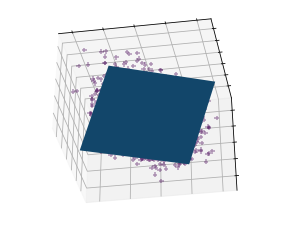

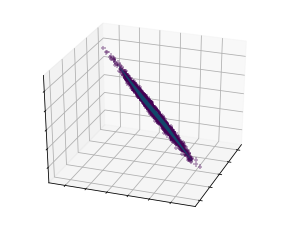

In [21]:
from sklearn.decomposition import PCA

from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Create the data
e = np.exp(1)
np.random.seed(4)

def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x)
                  + stats.norm(scale=4 / e).pdf(x))

y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm

# #############################################################################
# Plot the figures
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=elev, azim=azim)

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker='+', alpha=.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, V = scipy.linalg.svd(Y, full_matrices=False)

    pca = PCA(n_components=3)
    pca.fit(Y)
    pca_score = pca.explained_variance_ratio_
    V = pca.components_

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V.T
    x_pca_plane = np.r_[x_pca_axis[:2], - x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], - y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], - z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])


elev = -40
azim = -80
plot_figs(1, elev, azim)

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()